# Import Modules 

In [1]:
import os
import cv2
import xml.etree.ElementTree as ET
from matplotlib import pyplot as plt
import matplotlib.patches as patches

# Show Annotated Images in Pascal

In [2]:
def display_annotation(image_path, annotation_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load the corresponding annotation file
    tree = ET.parse(annotation_path)
    root = tree.getroot()

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(image)

    # Iterate over the bounding boxes in the annotation
    for obj in root.findall('object'):
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)

        # Create a rectangle patch for each bounding box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')

        # Add the rectangle patch to the axes
        ax.add_patch(rect)

    # Display the image with bounding boxes
    plt.axis('off')
    plt.show()




Example 01

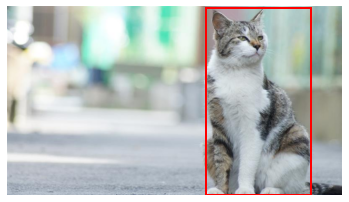

In [3]:
# Example 01
image_path = r"C:\Users\waqar\Desktop\Annotation Conversion\Input Dir\cat.jpg"
annotation_path = r"C:\Users\waqar\Desktop\Annotation Conversion\Input Dir\cat.xml"
display_annotation(image_path, annotation_path)

Example 02

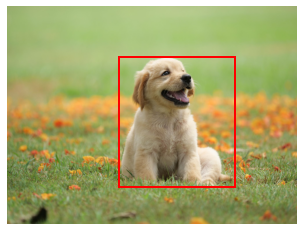

In [4]:
image_path = r"C:\Users\waqar\Desktop\Annotation Conversion\Input Dir\dog.jpg"
annotation_path = r"C:\Users\waqar\Desktop\Annotation Conversion\Input Dir\dog.xml"
display_annotation(image_path, annotation_path)

# Pascal to Yolo Conversion

In [5]:
import os
import xml.etree.ElementTree as ET

def convert_pascal_to_yolo(pascal_dir, output_dir):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Get list of XML files in Pascal VOC directory
    xml_files = [file for file in os.listdir(pascal_dir) if file.endswith('.xml')]

    # Create classes.txt file
    classes_set = set()
    for xml_file in xml_files:
        xml_path = os.path.join(pascal_dir, xml_file)
        tree = ET.parse(xml_path)
        root = tree.getroot()

        for obj in root.iter('object'):
            obj_name = obj.find('name').text
            classes_set.add(obj_name)

    classes = sorted(list(classes_set))
    classes_path = os.path.join(output_dir, 'classes.txt')
    with open(classes_path, 'w') as f:
        for cls in classes:
            f.write(cls + '\n')

    print('Created classes.txt file.')

    # Convert annotations to YOLO format
    for xml_file in xml_files:
        xml_path = os.path.join(pascal_dir, xml_file)
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Get image dimensions
        size = root.find('size')
        width = float(size.find('width').text)
        height = float(size.find('height').text)

        # Open output text file
        txt_file = os.path.splitext(xml_file)[0] + '.txt'
        txt_path = os.path.join(output_dir, txt_file)
        with open(txt_path, 'w') as f:
            # Process each object in the XML file
            for obj in root.iter('object'):
                obj_name = obj.find('name').text
                obj_index = classes.index(obj_name)
                bndbox = obj.find('bndbox')
                xmin = float(bndbox.find('xmin').text)
                ymin = float(bndbox.find('ymin').text)
                xmax = float(bndbox.find('xmax').text)
                ymax = float(bndbox.find('ymax').text)

                # Calculate bounding box center and width/height
                x_center = (xmin + xmax) / (2 * width)
                y_center = (ymin + ymax) / (2 * height)
                bbox_width = (xmax - xmin) / width
                bbox_height = (ymax - ymin) / height

                # Write object information in YOLO format with class index
                f.write('{} {:.6f} {:.6f} {:.6f} {:.6f}\n'.format(obj_index, x_center, y_center, bbox_width, bbox_height))

        print('Converted:', xml_file)

    print('Conversion completed.')




In [6]:
# Provide the path to the Pascal VOC directory and output directory
pascal_dir = r"C:\Users\waqar\Desktop\Annotation Conversion\Input Dir"
output_dir = r"C:\Users\waqar\Desktop\Annotation Conversion\ouput Dir"

convert_pascal_to_yolo(pascal_dir, output_dir)

Created classes.txt file.
Converted: cat.xml
Converted: dog.xml
Conversion completed.
